In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as pl

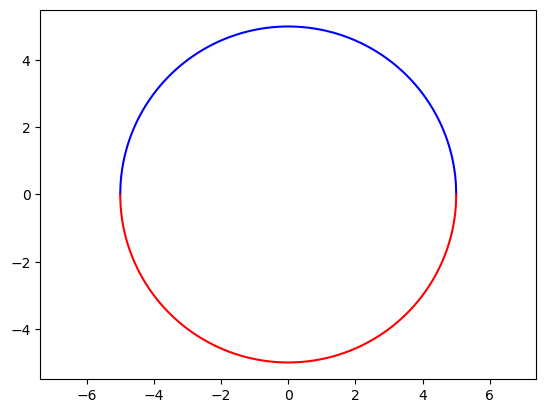

In [2]:
def Slide_5_a ():
    
    r = 5

    def f1 (x):
        return np.sqrt (r ** 2 - x ** 2)

    def f2 (x):
        return - f1 (x)

    xx = np.linspace (-r, r, 1000)
    yy1 = f1 (xx)
    yy2 = f2 (xx)
    pl.plot (xx, yy1, 'blue')
    pl.plot (xx, yy2, 'red')
    pl.axis ('equal')

Slide_5_a()

In [3]:
def Circle (t):
        r = 5
        x = r * np.cos (t)
        y = r * np.sin (t)
        return np.array ([x, y])

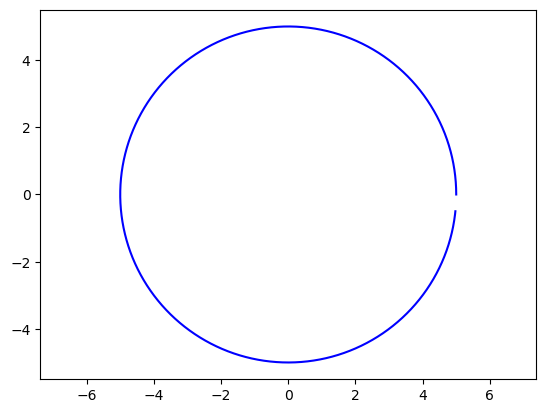

In [4]:
def Slide_5_b ():

    tt = np.linspace (0, 2 * np.pi - 0.1, 1000)
    cc = Circle (tt)
    pl.plot (cc [0], cc [1], 'blue')
    pl.axis ('equal')

Slide_5_b()

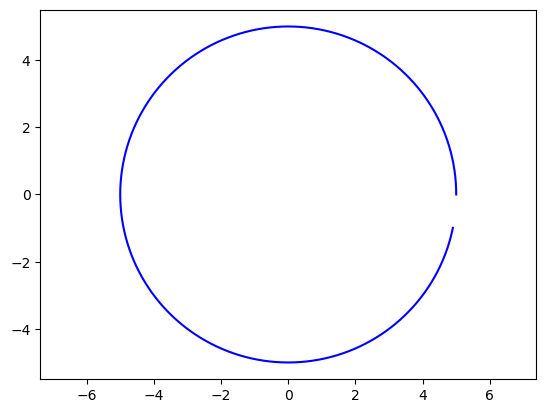

In [5]:
def Slide_6_a ():

    def c (t):
        return Circle (2 * t)

    tt = np.linspace (0, np.pi - 0.1, 1000)
    cc = c (tt)
    pl.plot (cc [0], cc [1], 'blue')
    pl.axis ('equal')

Slide_6_a()

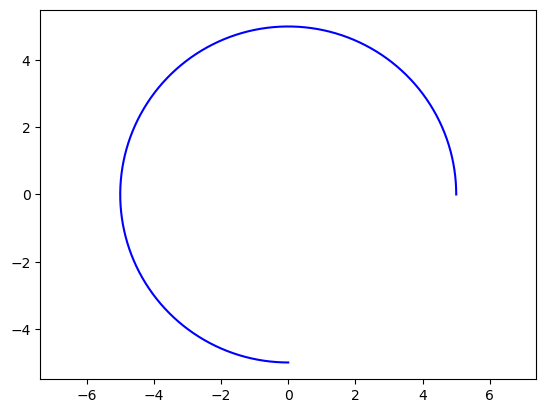

In [6]:
def Slide_6_b ():
    
    def c (t):
        return Circle (2 * np.pi * t)

    tt = np.linspace (0, 0.75, 1000)
    cc = c (tt)
    pl.plot (cc [0], cc [1], 'blue')
    pl.axis ('equal')

Slide_6_b()

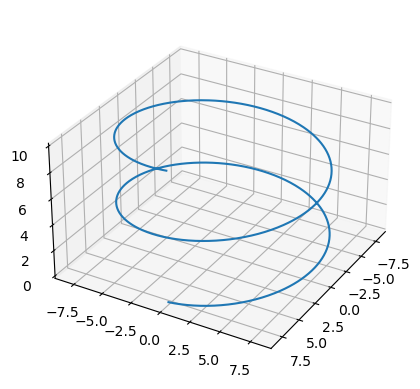

In [7]:
def Slide_8 ():

    r = 8
    h = 5

    def c (t):
        x = r * np.cos (t)
        y = r * np.sin (t)
        z = h * t / (2 * np.pi)
        return np.array ([x, y, z])
    
    tt = np.linspace (0, 4 * np.pi, 1000)
    cc = c (tt)
    ax = pl.figure() .add_subplot (projection = '3d')
    ax.set_box_aspect ((np.ptp (cc [0]), np.ptp (cc [1]), np.ptp (cc [2])))
    ax.plot (cc [0], cc [1], cc [2])
    ax.view_init (30, 30)

Slide_8()

In [8]:
def InterPoly (p):
    x = p [0:1] .T
    y = p [1:2] .T
    n = len (x)
    k = np.arange (n)
    A = x ** k
    c = la.solve (A, y)
    return c

In [9]:
def Example1 ():
    return np.array ([
        [0, 1, 2, 3],
        [1, 1, 0, 1]
    ])

In [10]:
def Slide_15 ():

    f = InterPoly (Example1())
    print (f)

Slide_15()

[[ 1. ]
 [ 1.5]
 [-2. ]
 [ 0.5]]


In [11]:
def EvalPoly (c, x):
    n = len (c)
    k = np.arange (n)
    return x ** k @ c

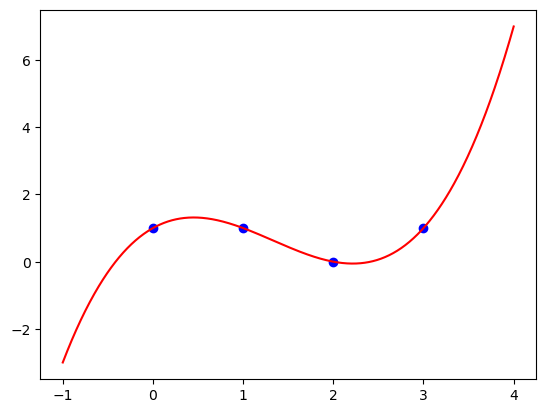

In [12]:
def Slide_16_a ():

    p = Example1()
    c = InterPoly (p)
    xx = np.linspace (np.min (p [0]) - 1, np.max (p [0]) + 1, 1000) .reshape (-1, 1)
    yy = EvalPoly (c, xx)
    pl.plot (p [0], p [1], 'o', color = 'blue')
    pl.plot (xx, yy, 'red')

Slide_16_a()

In [13]:
def Example2 (n):
    x = np.arange (n)
    y = np.zeros (n)
    y [n >> 1] = 1
    return np.array ([x, y])

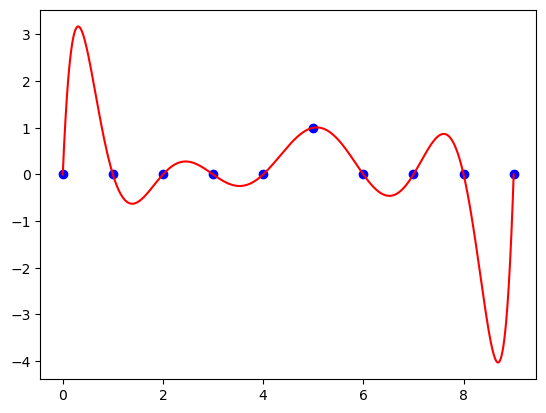

In [14]:
def Slide_16_b ():
    p = Example2 (10)
    c = InterPoly (p)
    xx = np.linspace (np.min (p [0]), np.max (p [0]), 1000) .reshape (-1, 1)
    yy = EvalPoly (c, xx)
    pl.plot (p [0], p [1], 'o', color = 'blue')
    pl.plot (xx, yy, 'red')

Slide_16_b()

In [15]:
def LagrangePoly (i, x, xx):
    n = len (x)
    yy = 1
    for k in range (n):
        if i != k:
            yy *= (xx - x [k]) / (x [i] - x [k])
    return yy

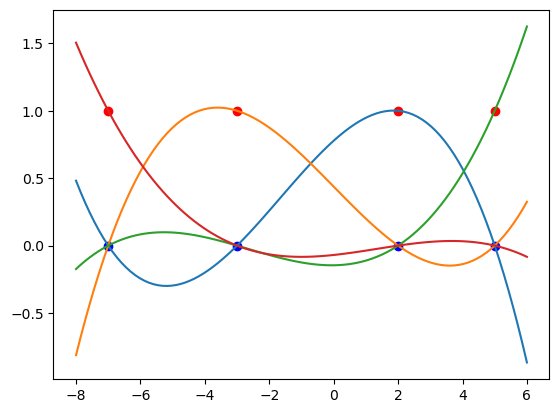

In [16]:
def Slide_18_a ():
    x = np.array ([2, -3, 5, -7])
    n = len (x)
    y0 = np.zeros (n)
    y1 = y0 + 1
    pl.plot (x, y0, 'o', color = 'blue')
    pl.plot (x, y1, 'o', color = 'red')
    xx = np.linspace (np.min (x) - 1, np.max (x) + 1, 100)
    for i in range (n):
        yy = LagrangePoly (i, x, xx)
        pl.plot (xx, yy)

Slide_18_a()

In [17]:
def LagrangeInterPoly (p, xx):
    x = p [0]
    y = p [1]
    n = len (x)
    yy = np.zeros_like (xx)
    for i in range (n):
        yy += y [i] * LagrangePoly (i, x, xx)
    return yy

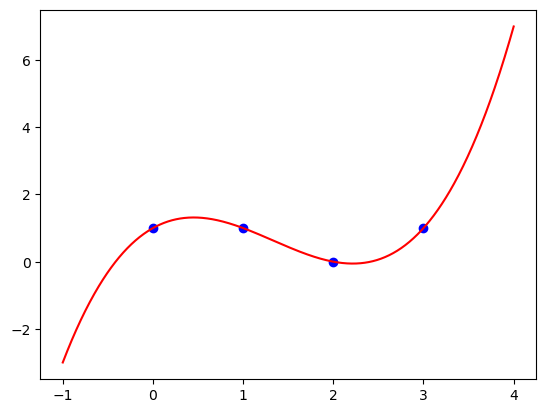

In [18]:
def Slide_18_b ():

    p = Example1()
    xx = np.linspace (np.min (p [0]) - 1, np.max (p [0]) + 1, 1000)
    yy = LagrangeInterPoly (p, xx)
    pl.plot (p [0], p [1], 'o', color = 'blue')
    pl.plot (xx, yy, 'red')

Slide_18_b()

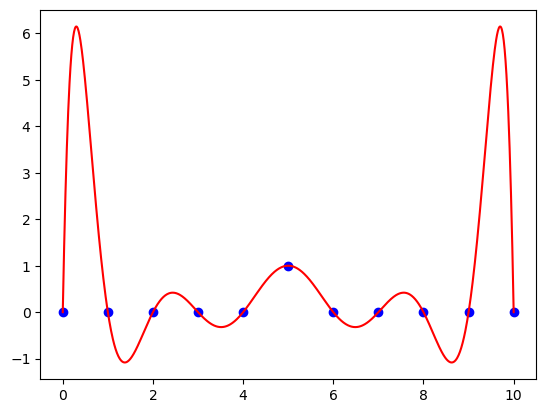

In [19]:
def Slide_18_c ():

    p = Example2 (11)
    xx = np.linspace (np.min (p [0]), np.max (p [0]), 1000)
    yy = LagrangeInterPoly (p, xx)
    pl.plot (p [0], p [1], 'o', color = 'blue')
    pl.plot (xx, yy, 'red')

Slide_18_c()

In [20]:
def NewtonInterPoly (p, xx):

    n = p.shape [1]
    x = p [0]
    y = np.zeros ((n, n))
    y [:, 0] = np.array (p [1]) .T

    for k in range (1, n):
        for i in range (n - k):
            y [i, k] = (y [i + 1, k - 1] - y [i, k - 1]) / (x [i + k] - x [i])

    pp = xx - xx + 1
    yy = xx - xx + y [0, 0]
    for i in range (1, n):
        pp *= xx - x [i - 1]
        yy += y [0, i] * pp
    return yy

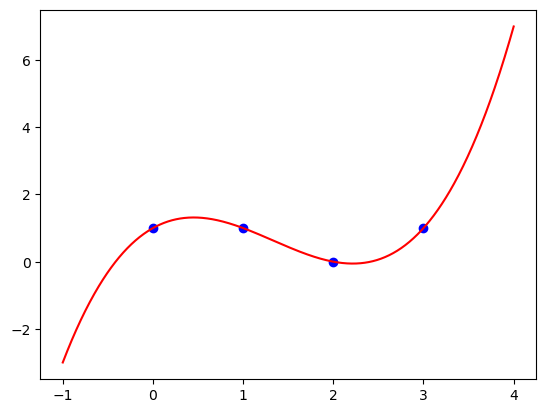

In [21]:
def Slide_19_a ():
    p = Example1()
    xx = np.linspace (np.min (p [0]) - 1, np.max (p [0]) + 1, 1000)
    yy = NewtonInterPoly (p, xx)
    pl.plot (p [0], p [1], 'o', color = 'blue')
    pl.plot (xx, yy, 'red')

Slide_19_a()

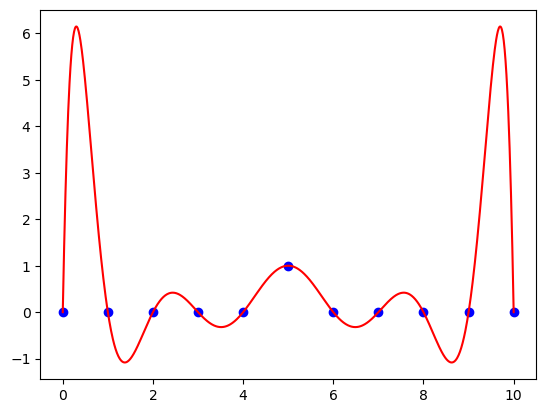

In [22]:
def Slide_19_b ():
    p = Example2 (11)
    xx = np.linspace (np.min (p [0]), np.max (p [0]), 1000)
    yy = NewtonInterPoly (p, xx)
    pl.plot (p [0], p [1], 'o', color = 'blue')
    pl.plot (xx, yy, 'red')

Slide_19_b()

In [23]:
def DeCasteljau0 (p, t):
    n = p.shape [1]
    if n <= 1:
        return p [:, 0]
    q = (1 - t) * p [:, :-1] + t * p [:, 1:]
    return DeCasteljau0 (q, t)

def DeCasteljau (p, tt):
    pp = np.array ([DeCasteljau0 (p, t) for t in tt])
    return pp.T

In [24]:
def Example3 ():
    return np.array ([
        [-1, 0, 1],
        [-1, 1, 0]
    ])

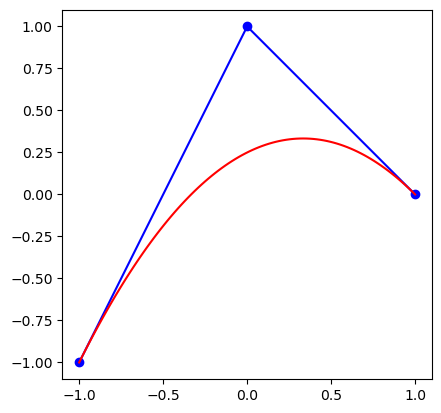

In [25]:
def Slide_23 ():
    p = Example3()
    pl.plot (p [0], p [1], 'o', color = 'blue')
    pl.plot (p [0], p [1], color = 'blue')
    tt = np.linspace (0, 1, 100)
    qq = DeCasteljau (p, tt)
    pl.plot (qq [0], qq [1], 'red')
    pl.axis ('scaled')

Slide_23()

In [26]:
def Example4 ():
    return np.array ([
        [-2, -1, 2, 3],
        [-2,  1, 2, -1]
    ])

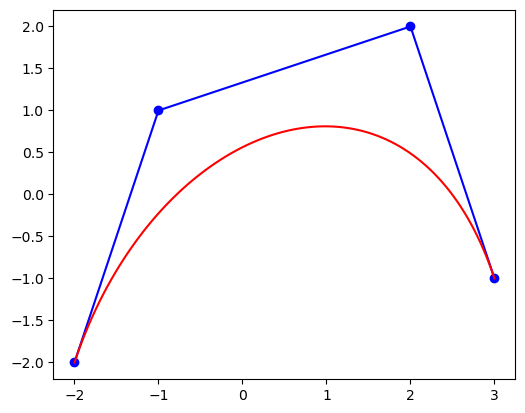

In [27]:
def Slide_24 ():
    p = Example4()
    pl.plot (p [0], p [1], 'o', color = 'blue')
    pl.plot (p [0], p [1], color = 'blue')
    tt = np.linspace (0, 1, 100)
    qq = DeCasteljau (p, tt)
    pl.plot (qq [0], qq [1], 'red')
    pl.axis ('scaled')

Slide_24()

In [28]:
def Binom (n, k):
    j = np.arange (1, n - k + 1)
    f = 1 + k / j
    return np.prod (f)

In [29]:
def BinomTest (n):
    for i in range (n + 1):
        a = []
        for k in range (i + 1):
            a.append (Binom (i, k))
        print (a)

BinomTest (5)

[1.0]
[1.0, 1.0]
[1.0, 2.0, 1.0]
[1.0, 3.0, 3.0, 1.0]
[1.0, 4.0, 6.0, 4.0, 1.0]
[1.0, 5.0, 10.0, 10.0, 5.0, 1.0]


In [30]:
def Bernstein (n, k, tt):
    f1 = Binom (n, k)
    f2 = np.power (1 - tt, n - k);
    f3 = np.power (tt, k)
    return f1 * f2 * f3

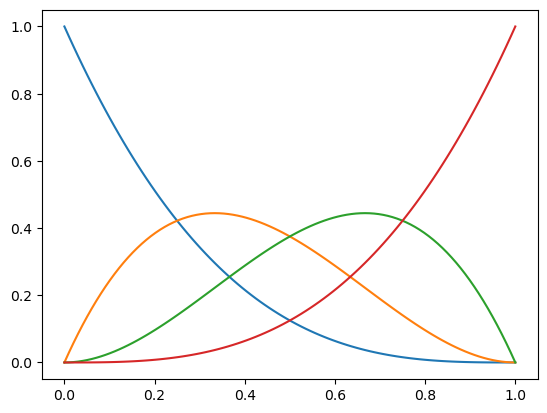

In [31]:
def Slide_25 ():
    n = 3
    xx = np.linspace (0, 1, 100)
    for k in range (n + 1):
        yy = Bernstein (n, k, xx)
        pl.plot (xx, yy)

Slide_25()

In [32]:
def Bezier (p, tt):
    n = p.shape [1] - 1
    cc = np.zeros ((p.shape [0], tt.shape [0]))
    for i in range (n + 1):
        b = Bernstein (n, i, tt) .reshape (1, -1)
        q = p [:, i] .reshape (-1, 1)
        cc += q @ b
    return cc;

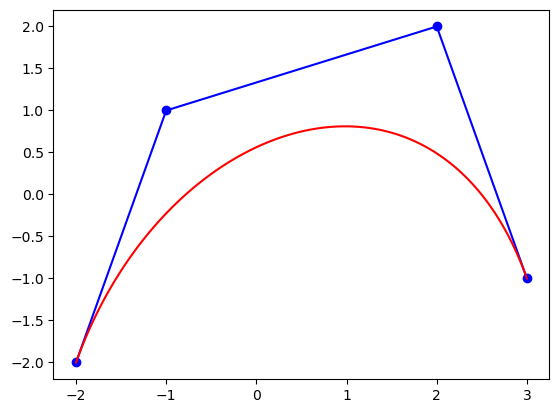

In [33]:
def Slide_27 ():
    p = Example4()
    tt = np.linspace (0, 1, 100)
    cc = Bezier (p, tt)
    pl.plot (p [0], p [1], 'blue')
    pl.plot (p [0], p [1], 'o', color = 'blue')
    pl.plot (cc [0], cc [1], 'red')

Slide_27()

In [34]:
def Example5 ():
    return np.array ([
        [-2, 1,  1, 2],
        [-1, 1, -1, 1]
    ])

In [35]:
def Example6 ():
    return np.array ([
        [-1, 2, -2,  1],
        [-1, 1,  1, -1]
    ])

In [36]:
def Example7 ():
    return np.array ([
        [-1, -1, 1,  1],
        [-1,  1, 1, -1]
    ])

In [37]:
def Example8 ():
    return np.array ([
        [0, 1, 2, 0],
        [0, 0, 0, 1]
    ])

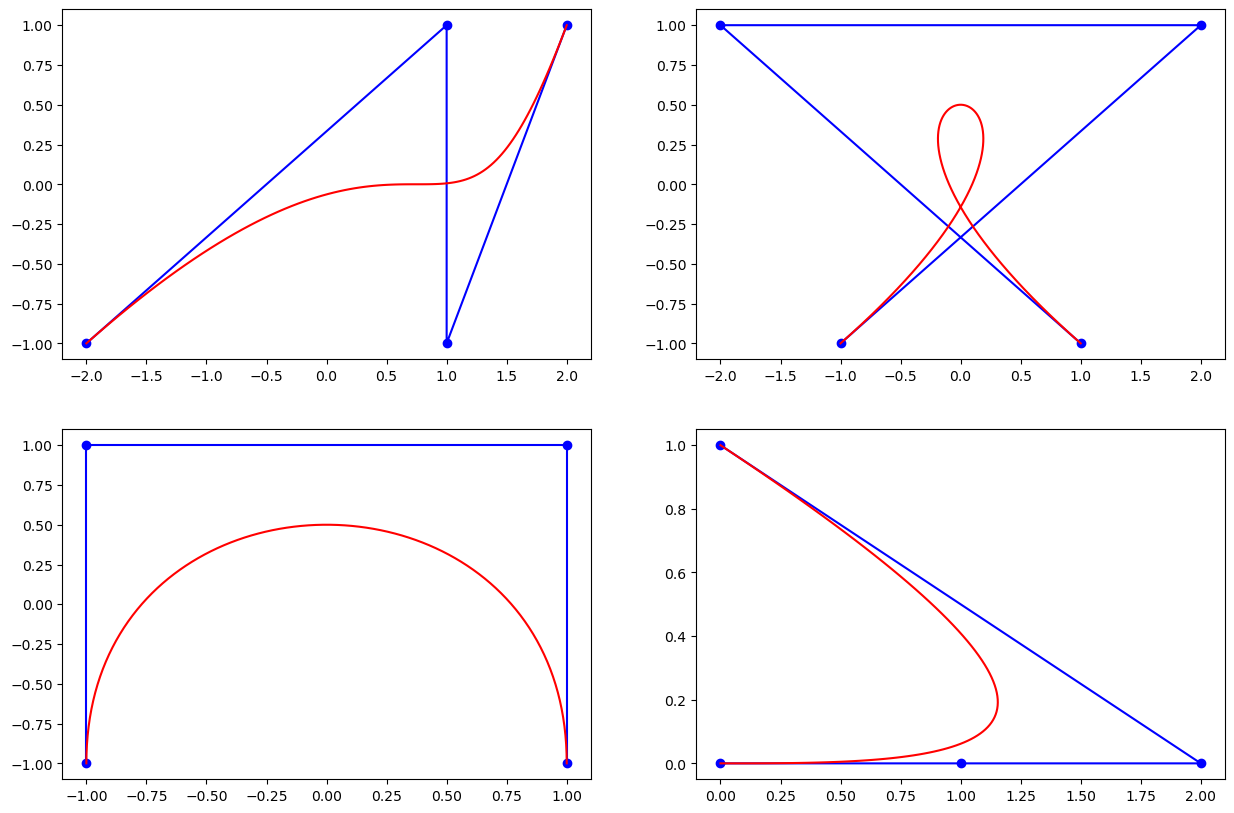

In [38]:
def Slide_29 ():
    pl.figure (figsize = (15, 10))
    ex = [Example5, Example6, Example7, Example8]
    for i in range (4):
        pl.subplot (2, 2, i + 1)
        p = ex [i] ()
        tt = np.linspace (0, 1, 100)
        cc = Bezier (p, tt)
        pl.plot (p [0], p [1], 'blue')
        pl.plot (p [0], p [1], 'o', color = 'blue')
        pl.plot (cc [0], cc [1], 'red')

Slide_29()

In [39]:
def N (i, k, t, tt):
    if (k == 0):
        return 0 + ((tt >= t [i]) & (tt < t [i + 1]))
    
    d = t [i + k] - t [i]
    f = 0 if (d == 0) else (tt - t [i]) / d
        
    d = t [i + k + 1] - t [i + 1]
    g = 0 if (d == 0) else (t [i + k + 1] - tt) / d
        
    return f * N (i, k - 1, t, tt) + g * N (i + 1, k - 1, t, tt) 

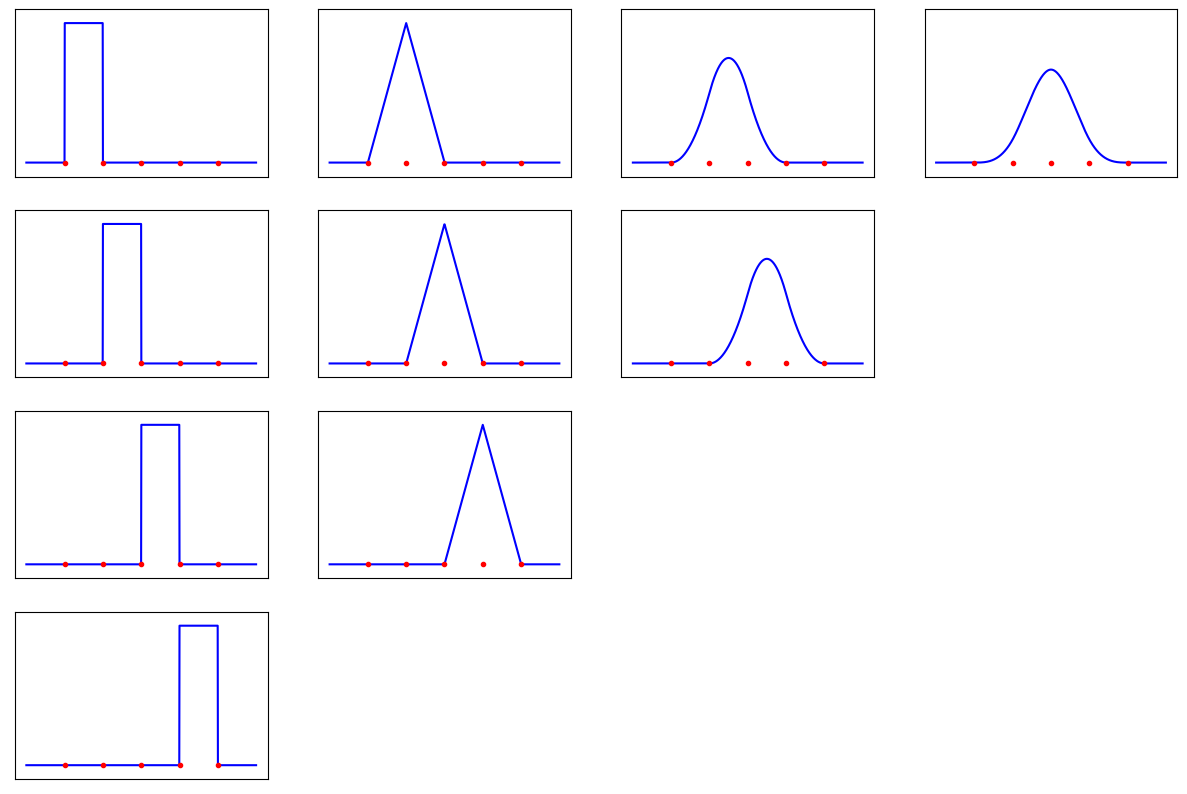

In [40]:
def Slide_30_ff ():
    t = [1, 2, 3, 4, 5]
    n = len (t) - 1
    tt = np.linspace (t [0] - 1, t [-1] + 1, 1000)
        
    pl.figure (figsize = (15, 10))
    for i in range (n):
        for k in range (n - i):
            pl.subplot (n, n, n * i + k + 1)
            pl.plot (tt, N (i, k, t, tt), color = 'blue')
            pl.plot (t, np.zeros_like (t), '.', color = 'red')
            pl.ylim ([-0.1, 1.1])
            g = pl.gca()
            g.xaxis.set_visible (False)
            g.yaxis.set_visible (False)

Slide_30_ff()

In [41]:
def Bsplines (k, t, p, tt):
    pp = np.zeros ((p.shape [0], len (tt)))
    for i in range (p.shape [1]):
        pp += p [:, i : i + 1] @ np.array ([N (i, k, t, tt)])
        
    return pp;    

Grad 3
9 Kontrollpunkte
13 Knoten


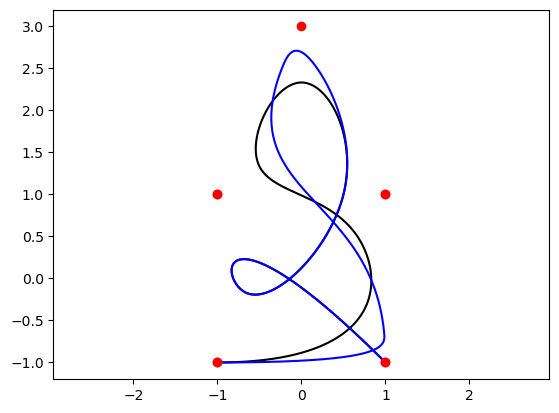

In [42]:
def Slide_36 ():
    k = 3

    p = np.array ([
        [-1,  1,  1, -1,  0,  1, -1, -1,  1.],
        [-1, -1,  1,  1,  3,  1, -1,  1, -1.]
    ])
    
    n = p.shape [1] - 1
    m = n + k + 1

    print ('Grad', k)
    print (n + 1, 'Kontrollpunkte')
    print (m + 1, 'Knoten')

    t1 = [0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 6, 6, 6.]
    t2 = np.cumsum ([0, 0, 0,   0, 1, 10, 1, 1, 1, 1,    0, 0, 0.])

    tt1 = np.linspace (t1 [0], t1 [-1], 10000, endpoint = False)
    tt2 = np.linspace (t2 [0], t2 [-1], 10000, endpoint = False)
    
    cc1 = Bsplines (k, t1, p, tt1)
    cc2 = Bsplines (k, t2, p, tt2)

    pl.plot (cc1 [0], cc1 [1], 'black')
    pl.plot (cc2 [0], cc2 [1], 'blue')
    pl.plot (p [0], p [1], 'o', color = 'red')
    pl.axis ('equal')

Slide_36()    

In [43]:
def Nurbs (k, t, p, w, tt):
    ww = np.array ([w])
    return Bsplines (k, t, p * ww, tt) / Bsplines (k, t, ww, tt)

Grad 3
9 Kontrollpunkte
13 Knoten


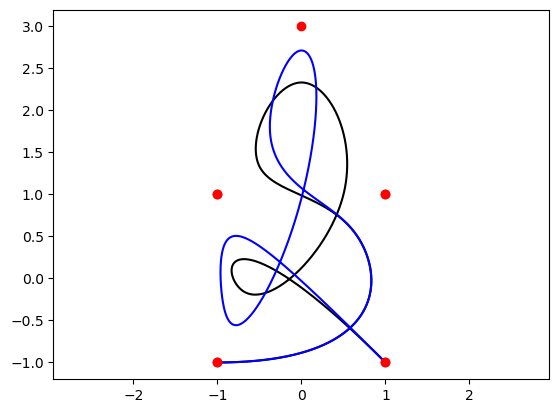

In [44]:
def Slide_38 ():
    k = 3

    p = np.array ([
        [-1,  1,  1, -1,  0,  1, -1, -1,  1.],
        [-1, -1,  1,  1,  3,  1, -1,  1, -1.],
    ])
    
    w = [ 1,  1,  1,  1,  3,  1,  5,  5,  1.]
    
    n = p.shape [1] - 1
    m = n + k + 1

    print ('Grad', k)
    print (n + 1, 'Kontrollpunkte')
    print (m + 1, 'Knoten')

    t = [0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 6, 6, 6.]

    tt = np.linspace (t [0], t [-1], 10000, endpoint = False)
    cc1 = Bsplines (k, t, p, tt)
    cc2 = Nurbs (k, t, p, w, tt)
    
    pl.plot (cc1 [0], cc1 [1], 'black')
    pl.plot (cc2 [0], cc2 [1], 'blue')
    pl.plot (p [0], p [1], 'o', color = 'red')
    pl.axis ('equal')

Slide_38()    